In [89]:
import numpy as np
import cv2
import random
from matplotlib import pyplot as plt

import dsbhelper as dsb
import nuclei
import model as modellib


In [90]:
TRAIN_DATA = 'stage1_train'

In [91]:
# configure the trainer for inference
config = nuclei.InferenceConfig()

In [92]:
# set up the dataset and load validate data
dataset_val = nuclei.NucleiDataset()
dataset_val.load_data(TRAIN_DATA, mode='validate', filter_ids=dsb.validation_set)
dataset_val.prepare()

In [93]:
# load the model
local_model_folder = 'model'
model = modellib.MaskRCNN(mode="inference", config=config, model_dir=local_model_folder)


In [94]:
# load weights
model.load_weights('./model/mask_rcnn.h5', by_name=True)

In [95]:
# pick a specimen
#image_id = random.choice(dataset_val.image_ids)
image_id = 1
image_data = dataset_val.get_info(image_id)
print(image_data['specimen_id'])

00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e


In [96]:
#for image_id in dataset_val.image_ids:
#    image_data = dataset_val.get_info(image_id)
#    print('{} -> {}'.format(image_id, image_data['specimen_id']))

In [97]:
# get ground truth data
original_image, \
image_meta, \
class_ids, \
rois,\
gt_masks = modellib.load_image_gt(dataset_val, config, image_id, use_mini_mask=False)

/Users/farrar/py3/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


In [98]:
def get_image_meta_image_id(meta):
    return meta[0]

def get_image_meta_shape(meta):
    return meta[1:4]

def get_image_meta_window(meta):
    window = meta[4:8]
    y1 = meta[4]
    x1 = meta[5]
    y2 = meta[6]
    x2 = meta[7]
    
    return x1, y1, x2, y2

# -----------------
print(get_image_meta_image_id(image_meta))
print(get_image_meta_shape(image_meta))
print(get_image_meta_window(image_meta))

1
[320 384   3]
(0, 42, 512, 469)


(512, 512, 3)


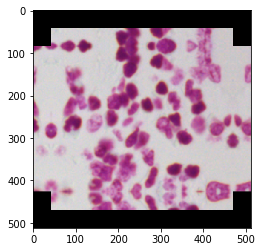

In [99]:
print(original_image.shape)
plt.imshow(original_image)


(256, 320, 3)


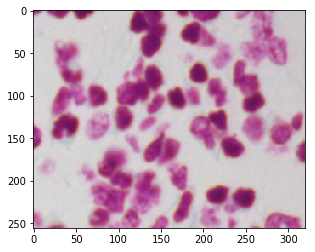

In [107]:
def crop_window_and_resize(image, meta): 
    
    shape = meta[1:4]
    y1 = meta[4]
    x1 = meta[5]
    y2 = meta[6]
    x2 = meta[7]
    
    crop = image[y1:y2, x1:x2]
    
    if crop.dtype == np.bool:
        crop.dtype = np.uint8
        resize = cv2.resize(crop, (shape[1], shape[0]))
        resize.dtype = np.bool
    else:
        resize = cv2.resize(crop, (shape[1], shape[0]))
    
    return resize

resize = crop_window_and_resize(original_image, image_meta)
unmirror = dsb.crop_mirror(resize)
print(unmirror.shape)
plt.imshow(unmirror)
    

(256, 320)


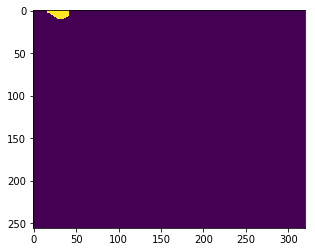

In [108]:
resize = crop_window_and_resize(gt_masks[:,:,0], image_meta)
unmirror = dsb.crop_mirror(resize)
print(unmirror.shape)
plt.imshow(unmirror)


In [109]:
#scores = None
scores = np.zeros((36), dtype=np.uint8)

In [112]:
if scores is None:
    print('None')
else:
    print('some')

some
